**1. Xây dựng công thức tính forward và backward (tính đạo hàm cho từng tham số) cho bài toán softmax regression dùng phương pháp dựa trên hàm delta.**

**a) Stochastic gradient descent**

Gọi $k$ là số loại label, $d$ là số chiều của dữ liệu ta quy ước $\boldsymbol\Theta$ và $\boldsymbol x$  như sau:

\begin{align*}
\boldsymbol\Theta &= \begin{bmatrix}
                      w_{01} & w_{02} & ... & w_{0k} \\
                      w_{11} & w_{12} & ... & w_{1k} \\
                      ... & ... & ... & ... \\
                      w_{d1} & w_{d2} & ... & w_{dk} \end{bmatrix} = \begin{bmatrix} \boldsymbol\theta_{1} & \boldsymbol\theta_{2} & ... & \boldsymbol\theta_{k} \end{bmatrix} \in \mathbb{R}^{(d+1) \times k}\\ 
\\
\boldsymbol x &= \begin{bmatrix}1 & x_{1} & ... & x_{d} \end{bmatrix}^T \in \mathbb{R}^{d+1}\\
\end{align*}

Từ $\boldsymbol\Theta$ và $\boldsymbol x$ ta tính $\boldsymbol z$:
\begin{align*}
\boldsymbol z &= \boldsymbol\Theta^T \boldsymbol x = \begin{bmatrix}z_{1} & z_{2} & ... & z_{k} \end{bmatrix}^T \in \mathbb{R}^{k}\\
\end{align*}

Tính $\hat{y}$:
\begin{align*}
\hat{y} &= \begin{bmatrix}\frac{e^{z_1}}{\sum_{j=1}^{k} e^{z_j}} & \frac{e^{z_2}}{\sum_{j=1}^{k} e^{z_j}} & ... & \frac{e^{z_k}}{\sum_{j=1}^{k} e^{z_j}} \end{bmatrix}^T \\
&= \begin{bmatrix}\hat{y}_{1} & \hat{y}_{2} & ... & \hat{y}_{k} \end{bmatrix} ^T \in \mathbb{R}^{k} \\
\end{align*} 

Tính loss: 
\begin{align*}
L(\boldsymbol \Theta) = -\sum_{i=1}^{k}\delta(i,y)log\hat{y}_i
\end{align*} 

Đạo hàm $L(\boldsymbol \Theta)$ theo $w_{qj}$:
\begin{align*}
\frac{\partial L(\boldsymbol \Theta)}{\partial w_{qj}} = \frac{\partial L}{\partial \hat{y}_{i}} \frac{\partial \hat{y}_{i}}{\partial z_{j}} \frac{\partial z_{j}}{\partial w_{qj}}
\end{align*}

- Tính $\frac{\partial L}{\partial \hat{y}_{i}}$:
\begin{align*}
\frac{\partial L}{\partial \hat{y}_{i}} = -\sum_{i=1}^{k}\frac{\delta(i,y)}{\hat{y}_i}
\end{align*}

- Tính $\frac{\partial \hat{y}_{i}}{\partial z_{j}}$:
\begin{align*}
\hat{y}_{i} &= \frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}} \\
\frac{\partial\hat{y}_{i}}{\partial z_{j}} &= \frac{\delta(i, j)e^{z_{i}}\sum_{j=1}^{k} e^{z_{j}}-e^{z_{i}}e^{z_{j}}}{\left(\sum_{j=1}^{k} e^{z_{j}}\right)^2} \\
&= \delta(i, j)\hat{y}_{i} - \hat{y}_{i}\hat{y}_{j} \\
&= \hat{y}_{i}(\delta(i, j)-\hat{y}_{j}) \\
\end{align*}

- Tính $\frac{\partial z_{j}}{\partial w_{qj}}$:
\begin{align*}
\frac{\partial z_{j}}{\partial w_{qj}} = x_q
\end{align*}

- Tính $\frac{\partial L(\boldsymbol \Theta)}{\partial w_{qj}}$:
\begin{align*}
\frac{\partial L(\boldsymbol \theta)}{\partial w_{qj}} &= -\sum_{i=1}^{k}\frac{\delta(i, y)}{\hat{y}_i} \hat{y}_{i}(\delta(i, j)-\hat{y}_{j}) x_q \\
&= \sum_{i=1}^{k}\delta(i, y)(\hat{y}_{j} - \delta(i, j)) x_q\\ 
&= \sum_{i=1}^{k}\delta(i,y)\hat{y}_{j}x_q- \sum_{i=1}^{k}\delta(i, y)\delta(i, j)x_q \\
&= \hat{y}_{j}x_q- \delta(j,y)x_q \\
&= (\hat{y}_{j} - \delta(j, y)) x_q \\
\end{align*}

Gradient của $L(\boldsymbol \Theta)$ theo $\boldsymbol \Theta$:
\begin{align*}
\nabla_{\boldsymbol \Theta} L(\boldsymbol \Theta) = \frac{\partial L(\boldsymbol \Theta)}{\partial \boldsymbol \Theta} &= \begin{bmatrix}
\frac{\partial L}{\partial w_{01}} & \frac{\partial L}{\partial w_{02}} & ... & \frac{\partial L}{\partial w_{0k}} \\
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & ... & \frac{\partial L}{\partial w_{1k}} \\
... & ... & ... & ... \\
\frac{\partial L}{\partial w_{d1}} & \frac{\partial L}{\partial w_{d2}} & ... & \frac{\partial L}{\partial w_{dk}}
\end{bmatrix} \in \mathbb{R}^{(d+1) \times k} \\
&= \frac{1}{m}\begin{bmatrix}
(\hat{y}_{1} - \delta(1, y)) x_0 & (\hat{y}_{2} - \delta(2, y)) x_0 & ... & (\hat{y}_{k} - \delta(k, y)) x_0 \\
(\hat{y}_{1} - \delta(1, y)) x_1 & (\hat{y}_{2} - \delta(2, y)) x_1 & ... & (\hat{y}_{k} - \delta(k, y)) x_1 \\
... & ... & ... & ... \\
(\hat{y}_{1} - \delta(1, y)) x_d & (\hat{y}_{2} - \delta(2, y)) x_d & ... & (\hat{y}_{k} - \delta(k, y)) x_d \\
\end{bmatrix} \\
&= \frac{1}{m} \begin{bmatrix}1 & x_{1} & ... & x_{d} \end{bmatrix}^T \begin{bmatrix}
\hat{y}_{1} - \delta(1, y) & \hat{y}_{2} - \delta(2, y) & ... & \hat{y}_{k} - \delta(k, y)
\end{bmatrix}  \\
&= \frac{1}{m} \boldsymbol x \boldsymbol e^T
\end{align*}
Với $\boldsymbol e$ là vector như sau:
\begin{align*}
\boldsymbol e = \begin{bmatrix}
\hat{y}_{1} - \delta(1, y) & \hat{y}_{2} - \delta(2, y) & ... & \hat{y}_{k} - \delta(k, y)
\end{bmatrix}^T \in \mathbb{R}^{k} 
\end{align*}

Ở bước cuối cùng ta chỉ cần cập nhật $\boldsymbol \Theta$ với tốc độ học $\eta$:
\begin{align*}
\boldsymbol \Theta &= \boldsymbol \Theta - \eta \nabla_{\boldsymbol \Theta} L(\boldsymbol \Theta) \\ 
&= \boldsymbol \Theta - \eta\boldsymbol x \boldsymbol e ^T
\end{align*}

**b) Batch gradient descent**

Gọi $k$ là số loại label, $d$ là số chiều của dữ liệu, $m$ là số mẫu dữ liệu trong 1 batch ta quy ước $\boldsymbol\Theta$, $\boldsymbol X$ và $\boldsymbol y$ như sau:

\begin{align*}
\boldsymbol\Theta &= \begin{bmatrix}
                      w_{01} & w_{02} & ... & w_{0k} \\
                      w_{11} & w_{12} & ... & w_{1k} \\
                      ... & ... & ... & ... \\
                      w_{d1} & w_{d2} & ... & w_{dk} \end{bmatrix} = \begin{bmatrix} \boldsymbol\theta_{1} & \boldsymbol\theta_{2} & ... & \boldsymbol\theta_{k} \end{bmatrix} \in \mathbb{R}^{(d+1) \times k}\\ 
\\
\boldsymbol X &= \begin{bmatrix}
                  1 & 1 & ... & 1 \\
                  x_{1}^{(1)} & x_{1}^{(2)} & ... & x_{1}^{(m)} \\
                  ... & ... & ... & ... \\
                  x_{d}^{(1)} & x_{d}^{(2)} & ... & x_{d}^{(m)} \end{bmatrix} = \begin{bmatrix} \boldsymbol x^{(1)}& \boldsymbol x^{(2)} & ... & \boldsymbol x^{(m)} \end{bmatrix} \in \mathbb{R}^{(d+1) \times m}\\
\\
\boldsymbol y &= \begin{bmatrix} y^{(1)} & y^{(2)} & ... & y^{(m)} \\\end{bmatrix} \in \mathbb{R}^{1 \times m}\\       
\end{align*}

Từ $\boldsymbol\Theta$ và $\boldsymbol X$ ta tính $\boldsymbol Z$:
\begin{align*}
\boldsymbol Z &= \boldsymbol\Theta^TX  = \begin{bmatrix}
                  z_{1}^{(1)} & z_{1}^{(2)} & ... & z_{1}^{(m)} \\
                  z_{2}^{(1)} & z_{2}^{(2)} & ... & z_{2}^{(m)} \\
                  ... & ... & ... & ... \\
                  z_{k}^{(1)} & z_{k}^{(2)} & ... & z_{k}^{(m)} \end{bmatrix} \in \mathbb{R}^{k \times m}
\end{align*}

Gọi $\boldsymbol s$ là vector dòng chứa các phần tử là nghịch đảo của tổng các phần tử theo từng cột của $\boldsymbol Z$, ta có:
\begin{align*}
\boldsymbol s &= 1 \oslash \left(  \begin{bmatrix}1 & 1 & ... & 1 \end{bmatrix} e^{\boldsymbol Z} \right)  = \begin{bmatrix}
                  \frac{1}{\sum_{j=1}^{k} e^{z_j^{(1)}}} & \frac{1}{\sum_{j=1}^{k} e^{z_j^{(2)}}} & ... & \frac{1}{\sum_{j=1}^{k} e^{z_j^{(m)}}} \end{bmatrix} \in \mathbb{R}^{1 \times m}
\end{align*}
$\oslash$ là ký hiệu của Hadamard Division.

Từ đó ta tính được $\hat{Y}$:
\begin{align*}
\hat{Y} &= \boldsymbol s \circ \boldsymbol Z = softmax\left(\boldsymbol Z\right) = \begin{bmatrix}
                  \frac{e^{z_1^{(1)}}}{\sum_{j=1}^{k} e^{z_j^{(1)}}} & \frac{e^{z_1^{(2)}}}{\sum_{j=1}^{k} e^{z_j^{(2)}}} & ... & \frac{e^{z_1^{(m)}}}{\sum_{j=1}^{k} e^{z_j^{(m)}}} \\
                  \frac{e^{z_2^{(1)}}}{\sum_{j=1}^{k} e^{z_j^{(1)}}} & \frac{e^{z_2^{(2)}}}{\sum_{j=1}^{k} e^{z_j^{(2)}}} & ... & \frac{e^{z_2^{(m)}}}{\sum_{j=1}^{k} e^{z_j^{(m)}}} \\
                  ... & ... & ... & ... \\
                  \frac{e^{z_k^{(1)}}}{\sum_{j=1}^{k} e^{z_j^{(1)}}} & \frac{e^{z_k^{(2)}}}{\sum_{j=1}^{k} e^{z_j^{(2)}}} & ... & \frac{e^{z_k^{(m)}}}{\sum_{j=1}^{k} e^{z_j^{(m)}}}\end{bmatrix} = \begin{bmatrix}
                  \hat{y}_{1}^{(1)} & \hat{y}_{1}^{(2)} & ... & \hat{y}_{1}^{(m)} \\
                  \hat{y}_{2}^{(1)} & \hat{y}_{2}^{(2)} & ... & \hat{y}_{2}^{(m)} \\
                  ... & ... & ... & ... \\
                  \hat{y}_{k}^{(1)} & \hat{y}_{k}^{(2)} & ... & \hat{y}_{k}^{(m)} \end{bmatrix} \in \mathbb{R}^{k \times m}
\end{align*}

Tính loss:
\begin{align*}
L(\boldsymbol \Theta) = -\frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}\delta(i,y^{(n)})log\hat{y}_i^{(n)}
\end{align*}
Đạo hàm $L(\boldsymbol \Theta)$ theo $w_{qj}$:
\begin{align*}
\frac{\partial L(\boldsymbol \theta)}{\partial w_{qj}} = \frac{\partial L}{\partial \hat{y}_{i}^{(n)}} \frac{\partial \hat{y}_{i}^{(n)}}{\partial z_{j}^{(n)}} \frac{\partial z_{j}^{(n)}}{\partial w_{qj}}
\end{align*}

- Tính $\frac{\partial L}{\partial \hat{y}_{i}^{(n)}}$:
\begin{align*}
\frac{\partial L}{\partial \hat{y}_{i}^{(n)}} = -\frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}\frac{\delta(i,y^{(n)})}{\hat{y}_i^{(n)}}
\end{align*}


- Tính $\frac{\partial \hat{y}_{i}^{(n)}}{\partial z_{j}^{(n)}}$:
\begin{align*}
\frac{\partial\hat{y}_{i}^{(n)}}{\partial z_{j}^{(n)}} &= \hat{y}_{i}^{(n)}(\delta(i, j)-\hat{y}_{j}^{(n)}) \\
\end{align*}

- Tính $\frac{\partial z_{j}^{(n)}}{\partial w_{qj}}$:
\begin{align*}
\frac{\partial z_{j}^{(n)}}{\partial w_{qj}} = x_q^{(n)}
\end{align*}

- Tính $\frac{\partial L(\boldsymbol \Theta)}{\partial w_{qj}}$:
\begin{align*}
\frac{\partial L(\boldsymbol \theta)}{\partial w_{qj}} &= -\frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}\frac{\delta(i,y^{(n)})}{\hat{y}_i^{(n)}} \hat{y}_{i}^{(n)}(\delta(i, j)-\hat{y}_{j}^{(n)}) x_q^{(n)} \\
&= \frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}\delta(i,y^{(n)})(\hat{y}_{j}^{(n)} - \delta(i, j)) x_q^{(n)} \\ 
&= \frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}\delta(i,y^{(n)})\hat{y}_{j}^{(n)}x_q^{(n)}- \frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}\delta(i,y^{(n)})\delta(i, j)x_q^{(n)} \\
&= \frac{1}{m}\sum_{n=1}^{m}\hat{y}_{j}^{(n)}x_q^{(n)}- \frac{1}{m}\sum_{n=1}^{m}\delta(j,y^{(n)})x_q^{(n)} \\
&= \frac{1}{m}\sum_{n=1}^{m}(\hat{y}_{j}^{(n)} - \delta(j,y^{(n)})) x_q^{(n)}
\end{align*}

Gradient của $L(\boldsymbol \Theta)$ theo $\boldsymbol \Theta$:
\begin{align*}
\nabla_{\boldsymbol \Theta} L(\boldsymbol \Theta) = \frac{\partial L(\boldsymbol \Theta)}{\partial \boldsymbol \Theta} &= \frac{1}{m}\begin{bmatrix}
\frac{\partial L}{\partial w_{01}} & \frac{\partial L}{\partial w_{02}} & ... & \frac{\partial L}{\partial w_{0k}} \\
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & ... & \frac{\partial L}{\partial w_{1k}} \\
... & ... & ... & ... \\
\frac{\partial L}{\partial w_{d1}} & \frac{\partial L}{\partial w_{d2}} & ... & \frac{\partial L}{\partial w_{dk}}
\end{bmatrix} \in \mathbb{R}^{(d+1) \times k} \\
&= \frac{1}{m}\begin{bmatrix}
\sum_{n=1}^{m}(\hat{y}_{1}^{(n)} - \delta(1,y^{(n)})) x_0^{(n)} & \sum_{n=1}^{m}(\hat{y}_{2}^{(n)} - \delta(2,y^{(n)})) x_0^{(n)} & ... & \sum_{n=1}^{m}(\hat{y}_{k}^{(n)} - \delta(k,y^{(k)})) x_0^{(n)} \\
\sum_{n=1}^{m}(\hat{y}_{1}^{(n)} - \delta(1,y^{(n)})) x_1^{(n)} & \sum_{n=1}^{m}(\hat{y}_{2}^{(n)} - \delta(2,y^{(n)})) x_1^{(n)} & ... & \sum_{n=1}^{m}(\hat{y}_{k}^{(n)} - \delta(k,y^{(k)})) x_1^{(n)} \\
... & ... & ... & ... \\
\sum_{n=1}^{m}(\hat{y}_{1}^{(n)} - \delta(1,y^{(n)})) x_d^{(n)} & \sum_{n=1}^{m}(\hat{y}_{2}^{(n)} - \delta(2,y^{(n)})) x_d^{(n)} & ... & \sum_{n=1}^{m}(\hat{y}_{k}^{(n)} - \delta(k,y^{(k)})) x_d^{(n)}
\end{bmatrix} \\
&= \frac{1}{m} \begin{bmatrix}
                  1 & 1 & ... & 1 \\
                  x_{1}^{(1)} & x_{1}^{(2)} & ... & x_{1}^{(m)} \\
                  ... & ... & ... & ... \\
                  x_{d}^{(1)} & x_{d}^{(2)} & ... & x_{d}^{(m)} \end{bmatrix} \begin{bmatrix}
\hat{y}_{1}^{(1)} - \delta(1,y^{(1)}) & \hat{y}_{1}^{(2)} - \delta(1,y^{(2)}) & ... & \hat{y}_{1}^{(m)} - \delta(1,y^{(m)}) \\
\hat{y}_{2}^{(1)} - \delta(2,y^{(1)}) & \hat{y}_{2}^{(2)} - \delta(2,y^{(2)}) & ... & \hat{y}_{2}^{(m)} - \delta(2,y^{(m)}) \\
... & ... & ... & ... \\
\hat{y}_{k}^{(1)} - \delta(k,y^{(1)}) & \hat{y}_{k}^{(2)} - \delta(k,y^{(2)}) & ... & \hat{y}_{k}^{(m)} - \delta(k,y^{(m)})
\end{bmatrix} ^T \\
&= \frac{1}{m} \boldsymbol X \boldsymbol E ^T
\end{align*}
Với $\boldsymbol E$ là ma trận như sau:
\begin{align*}
\boldsymbol E = \begin{bmatrix}
\hat{y}_{1}^{(1)} - \delta(1,y^{(1)}) & \hat{y}_{1}^{(2)} - \delta(1,y^{(2)}) & ... & \hat{y}_{1}^{(m)} - \delta(1,y^{(m)}) \\
\hat{y}_{2}^{(1)} - \delta(2,y^{(1)}) & \hat{y}_{2}^{(2)} - \delta(2,y^{(2)}) & ... & \hat{y}_{2}^{(m)} - \delta(2,y^{(m)}) \\
... & ... & ... & ... \\
\hat{y}_{k}^{(1)} - \delta(k,y^{(1)}) & \hat{y}_{k}^{(2)} - \delta(k,y^{(2)}) & ... & \hat{y}_{k}^{(m)} - \delta(k,y^{(m)})
\end{bmatrix} \in \mathbb{R}^{k \times m} 
\end{align*}

Ở bước cuối cùng ta chỉ cần cập nhật $\boldsymbol \Theta$ với tốc độ học $\eta$:
\begin{align*}
\boldsymbol \Theta &= \boldsymbol \Theta - \eta \nabla_{\boldsymbol \Theta} L(\boldsymbol \Theta) \\ 
&= \boldsymbol \Theta - \frac{\eta}{m} \boldsymbol X \boldsymbol E ^T
\end{align*}

**2. Xây dựng công thức tính forward và backward (tính đạo hàm cho từng tham số) cho bài toán softmax regression dùng phương pháp dựa trên one-hot encoding.**

**a) Stochastic gradient descent**

Gọi $k$ là số loại label, $d$ là số chiều của dữ liệu, ta quy ước $\boldsymbol\Theta$, $\boldsymbol x$ và $\boldsymbol y$ (dạng one-hot) như sau:
\begin{align*}
\boldsymbol\Theta &= \begin{bmatrix}
                      w_{01} & w_{02} & ... & w_{0k} \\
                      w_{11} & w_{12} & ... & w_{1k} \\
                      ... & ... & ... & ... \\
                      w_{d1} & w_{d2} & ... & w_{dk} \end{bmatrix} = \begin{bmatrix} \boldsymbol\theta_{1} & \boldsymbol\theta_{2} & ... & \boldsymbol\theta_{k} \end{bmatrix} \in \mathbb{R}^{(d+1) \times k}\\ 
\\
\boldsymbol x &= \begin{bmatrix}1 & x_{1} & ... & x_{d} \end{bmatrix}^T \in \mathbb{R}^{d+1}\\
\\
\boldsymbol y &= \begin{bmatrix} y_{1} & y_{2} & ... & y_{k} \end{bmatrix}^T\in \mathbb{R}^{k}\\         
\end{align*}

Từ $\boldsymbol\Theta$ và $\boldsymbol x$ ta tính $\boldsymbol z$:
\begin{align*}
\boldsymbol z &= \boldsymbol\Theta^T \boldsymbol x = \begin{bmatrix}z_{1} & z_{2} & ... & z_{k} \end{bmatrix}^T \in \mathbb{R}^{k}\\
\end{align*}

Tính $\hat{y}$:
\begin{align*}
\hat{y} &= \begin{bmatrix}\frac{e^{z_1}}{\sum_{j=1}^{k} e^{z_j}} & \frac{e^{z_2}}{\sum_{j=1}^{k} e^{z_j}} & ... & \frac{e^{z_k}}{\sum_{j=1}^{k} e^{z_j}} \end{bmatrix}^T \\
&= \begin{bmatrix}\hat{y}_{1} & \hat{y}_{2} & ... & \hat{y}_{k} \end{bmatrix} ^T \in \mathbb{R}^{k} \\
\end{align*} 

Tính loss: 
\begin{align*}
L(\boldsymbol \Theta) = -\sum_{i=1}^{k}y_ilog\hat{y}_i
\end{align*}

Đạo hàm $L(\boldsymbol \Theta)$ theo $w_{qj}$:
\begin{align*}
\frac{\partial L(\boldsymbol \theta)}{\partial w_{qj}} = \frac{\partial L}{\partial \hat{y}_{i}} \frac{\partial \hat{y}_{i}}{\partial z_{j}} \frac{\partial z_{j}}{\partial w_{qj}}
\end{align*}

- Tính $\frac{\partial L}{\partial \hat{y}_{i}}$:
\begin{align*}
\frac{\partial L}{\partial \hat{y}_{i}} = -\sum_{i=1}^{k}\frac{y_i}{\hat{y}_i}
\end{align*}

- Tính $\frac{\partial \hat{y}_{i}}{\partial z_{j}}$:
\begin{align*}
\frac{\partial\hat{y}_{i}}{\partial z_{j}} &= \hat{y}_{i}(\delta(i, j)-\hat{y}_{j})
\end{align*}

- Tính $\frac{\partial z_{j}}{\partial w_{qj}}$:
\begin{align*}
\frac{\partial z_{j}}{\partial w_{qj}} = x_q
\end{align*}

- Tính $\frac{\partial L(\boldsymbol \Theta)}{\partial w_{qj}}$:
\begin{align*}
\frac{\partial L(\boldsymbol \theta)}{\partial w_{qj}} &= -\sum_{i=1}^{k}\frac{y_i}{\hat{y}_i} \hat{y}_{i}(\delta(i, j)-\hat{y}_{j}) x_q\\
&= \sum_{i=1}^{k}y_i(\hat{y}_{j} - \delta(i, j)) x_q\\ 
&= \sum_{i=1}^{k}y_i\hat{y}_{j}x_q- \sum_{i=1}^{k}y_i\delta(i, j)x_q\\
&= \hat{y}_{j}x_q - y_jx_q \\
&= (\hat{y}_{j}- y_j) x_q
\end{align*}

Gradient của $L(\boldsymbol \Theta)$ theo $\boldsymbol \Theta$:
\begin{align*}
\nabla_{\boldsymbol \Theta} L(\boldsymbol \Theta) = \frac{\partial L(\boldsymbol \Theta)}{\partial \boldsymbol \Theta} &= \begin{bmatrix}
\frac{\partial L}{\partial w_{01}} & \frac{\partial L}{\partial w_{02}} & ... & \frac{\partial L}{\partial w_{0k}} \\
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & ... & \frac{\partial L}{\partial w_{1k}} \\
... & ... & ... & ... \\
\frac{\partial L}{\partial w_{d1}} & \frac{\partial L}{\partial w_{d2}} & ... & \frac{\partial L}{\partial w_{dk}}
\end{bmatrix} \in \mathbb{R}^{(d+1) \times k} \\
&= \begin{bmatrix}
(\hat{y}_{1} - y_1) x_0 & (\hat{y}_{2} - y_2) x_0 & ... & (\hat{y}_{k} - y_k) x_0 \\
(\hat{y}_{1} - y_1) x_1 & (\hat{y}_{2} - y_2) x_1 & ... & (\hat{y}_{k} - y_k) x_1 \\
... & ... & ... & ... \\
(\hat{y}_{1} - y_1) x_d & (\hat{y}_{2} - y_2) x_d & ... & (\hat{y}_{k} - y_k) x_d \\
\end{bmatrix} \\
&= \begin{bmatrix}1 & x_{1} & ... & x_{d} \end{bmatrix}^T \begin{bmatrix}
\hat{y}_{1} - y_1 & \hat{y}_{2} - y_2 & ... & \hat{y}_{k} - y_k \end{bmatrix} \\
&= \boldsymbol x \boldsymbol e ^T
\end{align*}
Với $\boldsymbol E$ là vector như sau:
\begin{align*}
\boldsymbol e = \begin{bmatrix}
\hat{y}_{1} - y_1 & \hat{y}_{2} - y_2 & ... & \hat{y}_{k} - y_k
\end{bmatrix}^T \in \mathbb{R}^{k} 
\end{align*}

Ở bước cuối cùng ta chỉ cần cập nhật $\boldsymbol \Theta$ với tốc độ học $\eta$:
\begin{align*}
\boldsymbol \Theta &= \boldsymbol \Theta - \eta \nabla_{\boldsymbol \Theta} L(\boldsymbol \Theta) \\ 
&= \boldsymbol \Theta - \eta \boldsymbol x \boldsymbol e ^T
\end{align*}

**b) Batch gradient descent**

Gọi $k$ là số loại label, $d$ là số chiều của dữ liệu, $m$ là số mẫu dữ liệu trong 1 batch ta quy ước $\boldsymbol\Theta$, $\boldsymbol X$ và $\boldsymbol Y$ (dạng one-hot) như sau:
\begin{align*}
\boldsymbol\Theta &= \begin{bmatrix}
                      w_{01} & w_{02} & ... & w_{0k} \\
                      w_{11} & w_{12} & ... & w_{1k} \\
                      ... & ... & ... & ... \\
                      w_{d1} & w_{d2} & ... & w_{dk} \end{bmatrix} = \begin{bmatrix} \boldsymbol\theta_{1} & \boldsymbol\theta_{2} & ... & \boldsymbol\theta_{k} \end{bmatrix} \in \mathbb{R}^{(d+1) \times k}\\ 
\\
\boldsymbol X &= \begin{bmatrix}
                  1 & 1 & ... & 1 \\
                  x_{1}^{(1)} & x_{1}^{(2)} & ... & x_{1}^{(m)} \\
                  ... & ... & ... & ... \\
                  x_{d}^{(1)} & x_{d}^{(2)} & ... & x_{d}^{(m)} \end{bmatrix} = \begin{bmatrix} \boldsymbol x^{(1)}& \boldsymbol x^{(2)} & ... & \boldsymbol x^{(m)} \end{bmatrix} \in \mathbb{R}^{(d+1) \times m}\\
\\
\boldsymbol Y &= \begin{bmatrix}
                  y_{1}^{(1)} & y_{1}^{(2)} & ... & y_{1}^{(m)} \\
                  y_{2}^{(1)} & y_{2}^{(2)} & ... & y_{2}^{(m)} \\
                  ... & ... & ... & ... \\
                  y_{k}^{(1)} & y_{k}^{(2)} & ... & y_{k}^{(m)} \end{bmatrix} = \begin{bmatrix} \boldsymbol y^{(1)}& \boldsymbol y^{(2)} & ... & \boldsymbol y^{(m)} \end{bmatrix} \in \mathbb{R}^{k \times m}\\                  
\end{align*}

Từ $\boldsymbol\Theta$ và $\boldsymbol X$ ta tính $\boldsymbol Z$:
\begin{align*}
\boldsymbol Z &= \boldsymbol\Theta^TX  = \begin{bmatrix}
                  z_{1}^{(1)} & z_{1}^{(2)} & ... & z_{1}^{(m)} \\
                  z_{2}^{(1)} & z_{2}^{(2)} & ... & z_{2}^{(m)} \\
                  ... & ... & ... & ... \\
                  z_{k}^{(1)} & z_{k}^{(2)} & ... & z_{k}^{(m)} \end{bmatrix} \in \mathbb{R}^{k \times m}
\end{align*}

Gọi $\boldsymbol s$ là vector dòng chứa các phần tử là nghịch đảo của tổng các phần tử theo từng cột của $\boldsymbol Z$, ta có:
\begin{align*}
\boldsymbol s &= 1 \oslash \left(  \begin{bmatrix}1 & 1 & ... & 1 \end{bmatrix} e^{\boldsymbol Z} \right)  = \begin{bmatrix}
                  \frac{1}{\sum_{j=1}^{k} e^{z_j^{(1)}}} & \frac{1}{\sum_{j=1}^{k} e^{z_j^{(2)}}} & ... & \frac{1}{\sum_{j=1}^{k} e^{z_j^{(m)}}} \end{bmatrix} \in \mathbb{R}^{1 \times m}
\end{align*}
$\oslash$ là ký hiệu của Hadamard Division.

Từ đó ta tính được $\hat{Y}$:
\begin{align*}
\hat{Y} &= \boldsymbol s \circ \boldsymbol Z = softmax\left(\boldsymbol Z\right) = \begin{bmatrix}
                  \frac{e^{z_1^{(1)}}}{\sum_{j=1}^{k} e^{z_j^{(1)}}} & \frac{e^{z_1^{(2)}}}{\sum_{j=1}^{k} e^{z_j^{(2)}}} & ... & \frac{e^{z_1^{(m)}}}{\sum_{j=1}^{k} e^{z_j^{(m)}}} \\
                  \frac{e^{z_2^{(1)}}}{\sum_{j=1}^{k} e^{z_j^{(1)}}} & \frac{e^{z_2^{(2)}}}{\sum_{j=1}^{k} e^{z_j^{(2)}}} & ... & \frac{e^{z_2^{(m)}}}{\sum_{j=1}^{k} e^{z_j^{(m)}}} \\
                  ... & ... & ... & ... \\
                  \frac{e^{z_k^{(1)}}}{\sum_{j=1}^{k} e^{z_j^{(1)}}} & \frac{e^{z_k^{(2)}}}{\sum_{j=1}^{k} e^{z_j^{(2)}}} & ... & \frac{e^{z_k^{(m)}}}{\sum_{j=1}^{k} e^{z_j^{(m)}}}\end{bmatrix} = \begin{bmatrix}
                  \hat{y}_{1}^{(1)} & \hat{y}_{1}^{(2)} & ... & \hat{y}_{1}^{(m)} \\
                  \hat{y}_{2}^{(1)} & \hat{y}_{2}^{(2)} & ... & \hat{y}_{2}^{(m)} \\
                  ... & ... & ... & ... \\
                  \hat{y}_{k}^{(1)} & \hat{y}_{k}^{(2)} & ... & \hat{y}_{k}^{(m)} \end{bmatrix} \in \mathbb{R}^{k \times m}
\end{align*}

Tính loss:
\begin{align*}
L(\boldsymbol \Theta) = -\frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}y_i^{(n)}log\hat{y}_i^{(n)}
\end{align*}

Đạo hàm $L(\boldsymbol \Theta)$ theo $w_{qj}$:
\begin{align*}
\frac{\partial L(\boldsymbol \theta)}{\partial w_{qj}} = \frac{\partial L}{\partial \hat{y}_{i}^{(n)}} \frac{\partial \hat{y}_{i}^{(n)}}{\partial z_{j}^{(n)}} \frac{\partial z_{j}^{(n)}}{\partial w_{qj}}
\end{align*}

- Tính $\frac{\partial L}{\partial \hat{y}_{i}^{(n)}}$:
\begin{align*}
\frac{\partial L}{\partial \hat{y}_{i}^{(n)}} = -\frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}\frac{y_i^{(n)}}{\hat{y}_i^{(n)}}
\end{align*}


- Tính $\frac{\partial \hat{y}_{i}^{(n)}}{\partial z_{j}^{(n)}}$:
\begin{align*}
\frac{\partial\hat{y}_{i}^{(n)}}{\partial z_{j}^{(n)}} &= \hat{y}_{i}^{(n)}(\delta(i, j)-\hat{y}_{j}^{(n)})
\end{align*}

- Tính $\frac{\partial z_{j}^{(n)}}{\partial w_{qj}}$:
\begin{align*}
\frac{\partial z_{j}^{(n)}}{\partial w_{qj}} = x_q^{(n)}
\end{align*}

- Tính $\frac{\partial L(\boldsymbol \Theta)}{\partial w_{qj}}$:
\begin{align*}
\frac{\partial L(\boldsymbol \theta)}{\partial w_{qj}} &= -\frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}\frac{y_i^{(n)}}{\hat{y}_i^{(n)}} \hat{y}_{i}^{(n)}(\delta(i, j)-\hat{y}_{j}^{(n)}) x_q^{(n)} \\
&= \frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}y_i^{(n)}(\hat{y}_{j}^{(n)} - \delta(i, j)) x_q^{(n)} \\ 
&= \frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}y_i^{(n)}\hat{y}_{j}^{(n)}x_q^{(n)}- \frac{1}{m}\sum_{n=1}^{m}\sum_{i=1}^{k}y_i^{(n)}\delta(i, j)x_q^{(n)} \\
&= \frac{1}{m}\sum_{n=1}^{m}\hat{y}_{j}^{(n)}x_q^{(n)}- \frac{1}{m}\sum_{n=1}^{m}y_j^{(n)}x_q^{(n)} \\
&= \frac{1}{m}\sum_{n=1}^{m}(\hat{y}_{j}^{(n)} - y_j^{(n)}) x_q^{(n)}
\end{align*}

Gradient của $L(\boldsymbol \Theta)$ theo $\boldsymbol \Theta$:
\begin{align*}
\nabla_{\boldsymbol \Theta} L(\boldsymbol \Theta) = \frac{\partial L(\boldsymbol \Theta)}{\partial \boldsymbol \Theta} &= \frac{1}{m}\begin{bmatrix}
\frac{\partial L}{\partial w_{01}} & \frac{\partial L}{\partial w_{02}} & ... & \frac{\partial L}{\partial w_{0k}} \\
\frac{\partial L}{\partial w_{11}} & \frac{\partial L}{\partial w_{12}} & ... & \frac{\partial L}{\partial w_{1k}} \\
... & ... & ... & ... \\
\frac{\partial L}{\partial w_{d1}} & \frac{\partial L}{\partial w_{d2}} & ... & \frac{\partial L}{\partial w_{dk}}
\end{bmatrix} \in \mathbb{R}^{(d+1) \times k} \\
&= \frac{1}{m}\begin{bmatrix}
\sum_{n=1}^{m}(\hat{y}_{1}^{(n)} - y_1^{(n)}) x_0^{(n)} & \sum_{n=1}^{m}(\hat{y}_{2}^{(n)} - y_2^{(n)}) x_0^{(n)} & ... & \sum_{n=1}^{m}(\hat{y}_{k}^{(n)} - y_k^{(n)}) x_0^{(n)} \\
\sum_{n=1}^{m}(\hat{y}_{1}^{(n)} - y_1^{(n)}) x_1^{(n)} & \sum_{n=1}^{m}(\hat{y}_{2}^{(n)} - y_2^{(n)}) x_1^{(n)} & ... & \sum_{n=1}^{m}(\hat{y}_{k}^{(n)} - y_k^{(n)}) x_1^{(n)} \\
... & ... & ... & ... \\
\sum_{n=1}^{m}(\hat{y}_{1}^{(n)} - y_1^{(n)}) x_d^{(n)} & \sum_{n=1}^{m}(\hat{y}_{2}^{(n)} - y_2^{(n)}) x_d^{(n)} & ... & \sum_{n=1}^{m}(\hat{y}_{k}^{(n)} - y_k^{(n)}) x_d^{(n)} \\
\end{bmatrix} \\
&= \frac{1}{m} \begin{bmatrix}
                  1 & 1 & ... & 1 \\
                  x_{1}^{(1)} & x_{1}^{(2)} & ... & x_{1}^{(m)} \\
                  ... & ... & ... & ... \\
                  x_{d}^{(1)} & x_{d}^{(2)} & ... & x_{d}^{(m)} \end{bmatrix} \begin{bmatrix}
\hat{y}_{1}^{(1)} - y_1^{(1)} & \hat{y}_{1}^{(2)} - y_1^{(2)} & ... & \hat{y}_{1}^{(m)} - y_1^{(m)} \\
\hat{y}_{2}^{(1)} - y_2^{(1)} & \hat{y}_{2}^{(2)} - y_2^{(2)} & ... & \hat{y}_{2}^{(m)} - y_2^{(m)} \\
... & ... & ... & ... \\
\hat{y}_{k}^{(1)} - y_k^{(1)} & \hat{y}_{k}^{(2)} - y_k^{(2)} & ... & \hat{y}_{k}^{(m)} - y_k^{(m)}
\end{bmatrix} ^T \\
&= \frac{1}{m} \boldsymbol X \boldsymbol E ^T
\end{align*}
Với $\boldsymbol E$ là ma trận như sau:
\begin{align*}
\boldsymbol E = \begin{bmatrix}
\hat{y}_{1}^{(1)} - y_1^{(1)} & \hat{y}_{1}^{(2)} - y_1^{(2)} & ... & \hat{y}_{1}^{(m)} - y_1^{(m)} \\
\hat{y}_{2}^{(1)} - y_2^{(1)} & \hat{y}_{2}^{(2)} - y_2^{(2)} & ... & \hat{y}_{2}^{(m)} - y_2^{(m)} \\
... & ... & ... & ... \\
\hat{y}_{k}^{(1)} - y_k^{(1)} & \hat{y}_{k}^{(2)} - y_k^{(2)} & ... & \hat{y}_{k}^{(m)} - y_k^{(m)}
\end{bmatrix} \in \mathbb{R}^{k \times m} 
\end{align*}

Ở bước cuối cùng ta chỉ cần cập nhật $\boldsymbol \Theta$ với tốc độ học $\eta$:
\begin{align*}
\boldsymbol \Theta &= \boldsymbol \Theta - \eta \nabla_{\boldsymbol \Theta} L(\boldsymbol \Theta) \\ 
&= \boldsymbol \Theta - \frac{\eta}{m} \boldsymbol X \boldsymbol E ^T
\end{align*}

**3. Cài đặt bài toán softmax regression cho data ‘iris_1D_2c.csv’ bằng phương pháp dựa vào one-hot encoding.**

**a) Stochastic gradient descent**

[Text(0.5, 1.0, 'Training accuracy'),
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'accuracy')]

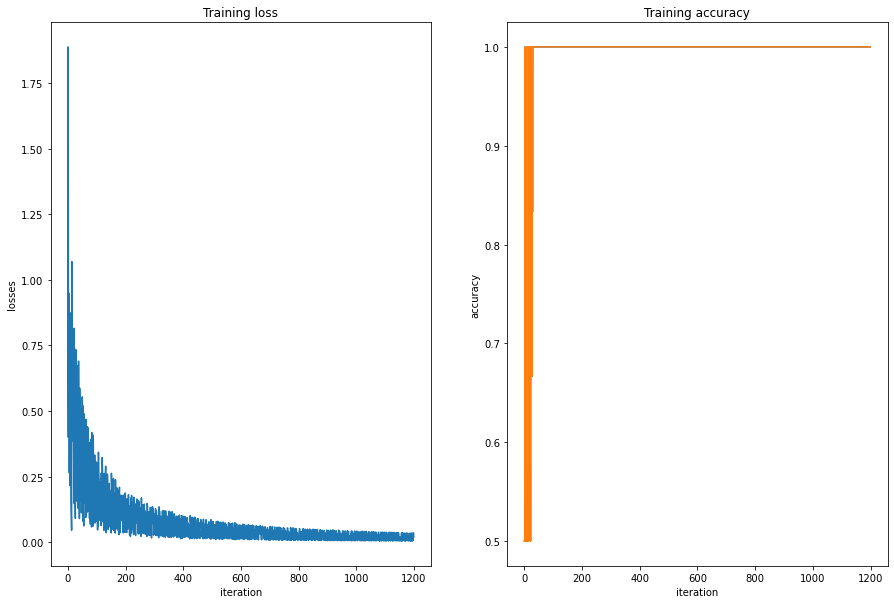

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8') # Nx1

# concatenation [1 X]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1) # Nx(d+1)

# one-hot encoding
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape((-1, 1))).T # kxN

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)
X = X[inds]
y = y[:, inds]

d = 1 # dimensionality
k = 2 # number of classes

# initialize parameters randomly
theta = np.random.rand(2,2) # kx(d+1)

# gradient descent loop
learning_rate = .1

losses = []
acc = []

num_iter = 200
num_sample_stochastic = 1

for epoch in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X = X[inds]
    y = y[:, inds]
    
    for i in range(X.shape[0]): 
        
        # pick 1 sample
        xi = X[i:i+1] # 1x(d+1)
        xi = xi.T # (d+1)x1
        yi = y[:,i:i+1] # kx1

        # evaluate class scores
        scores = np.dot(theta, xi) # kx1 
        
        #compute the class probabilities
        exp_scores = np.exp(scores) # kx1
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True) # kx1
        
        # compute the loss
        corect_logprobs = -yi*np.log(probs) # kx1 
        loss = np.sum(corect_logprobs)/1
        losses.append(loss)
                
        # compute yhati - yi
        dscores = probs - yi # kx1
        
        # backpropate the gradient to the parameters (W,b)
        dtheta = np.dot(xi, dscores.T) # (d+1)xk

        # perform a parameter update
        theta += -learning_rate *dtheta.T # kx(d+1)        
        
        # accuracy
        scores = np.dot(theta, X.T)
        predicted_class = np.argmax(scores, axis=0)
        acc.append(np.mean(encoder.transform(predicted_class.reshape((-1, 1))).T == y, axis=1))
        
# show figures
fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].plot(losses)
axs[0].set(title='Training loss', xlabel='iteration', ylabel='losses')
axs[1].plot(acc)
axs[1].set(title='Training accuracy', xlabel='iteration', ylabel='accuracy')


**b) Batch gradient descent**

[Text(0.5, 1.0, 'Training accuracy'),
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'accuracy')]

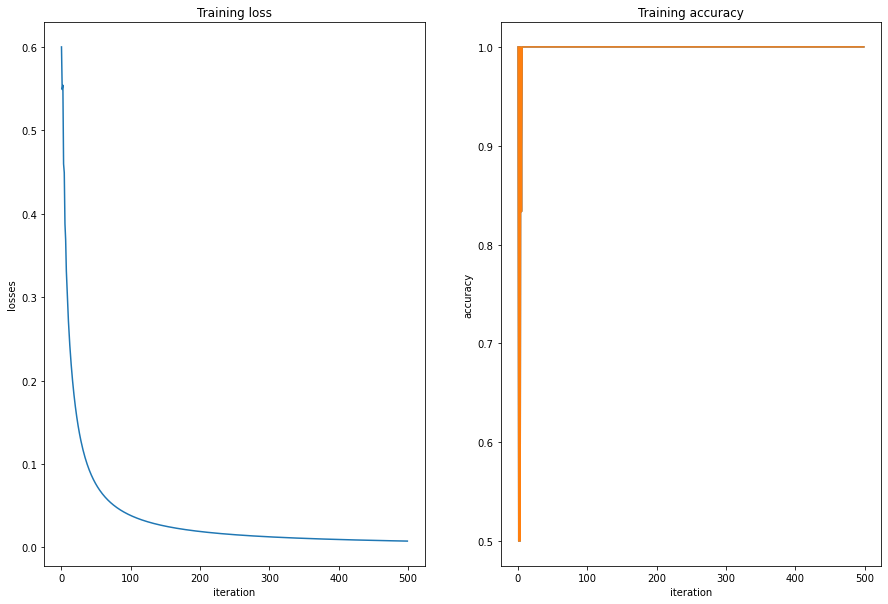

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8') # Nx1

# concatenation [1 X]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1) # Nx(d+1)

# one-hot encoding
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape((-1, 1))).T # kxN

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)
X = X[inds]
y = y[:, inds]

d = 1 # dimensionality
k = 2 # number of classes

# initialize parameters randomly
theta = np.random.rand(2,2) # kx(d+1)

# gradient descent loop
learning_rate = .1

losses = []
acc = []

num_iter = 500

for epoch in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X = X[inds]
    y = y[:, inds]

    # evaluate class scores
    scores = np.dot(theta, X.T) # kxN 

    #compute the class probabilities
    exp_scores = np.exp(scores) # kxN
    probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True) # kxN

    # compute the loss
    corect_logprobs = -y*np.log(probs) # kxN 
    loss = np.sum(corect_logprobs)/X.shape[0]
    losses.append(loss)

    # compute yhati - yi
    dscores = probs - y # kx1

    # backpropate the gradient to the parameters (W,b)
    dtheta = np.dot(X.T, dscores.T) # (d+1)xk

    # perform a parameter update
    theta += -learning_rate *dtheta.T # kx(d+1)        

    # accuracy
    scores = np.dot(theta, X.T)
    predicted_class = np.argmax(scores, axis=0)
    acc.append(np.mean(encoder.transform(predicted_class.reshape((-1, 1))).T == y, axis=1))
        
# show figures
fig, axs = plt.subplots(1, 2, figsize=(15,10))
axs[0].plot(losses)
axs[0].set(title='Training loss', xlabel='iteration', ylabel='losses')
axs[1].plot(acc)
axs[1].set(title='Training accuracy', xlabel='iteration', ylabel='accuracy')


**4) Cài đặt bài toán softmax regression cho data ‘iris_full.csv’ bằng phương pháp dựa vào one-hot encoding.**

**a) Stochastic gradient descent**

Testing loss:  0.13606291475927088
Testing accuracy:  0.9666666666666667
Training loss:  0.04081887442778126
Training accuracy:  0.96
Evaluation loss:  0.1941128845928052
Evaluation accuracy:  0.9


[Text(0.5, 1.0, 'Evaluation accuracy'),
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'accuracy')]

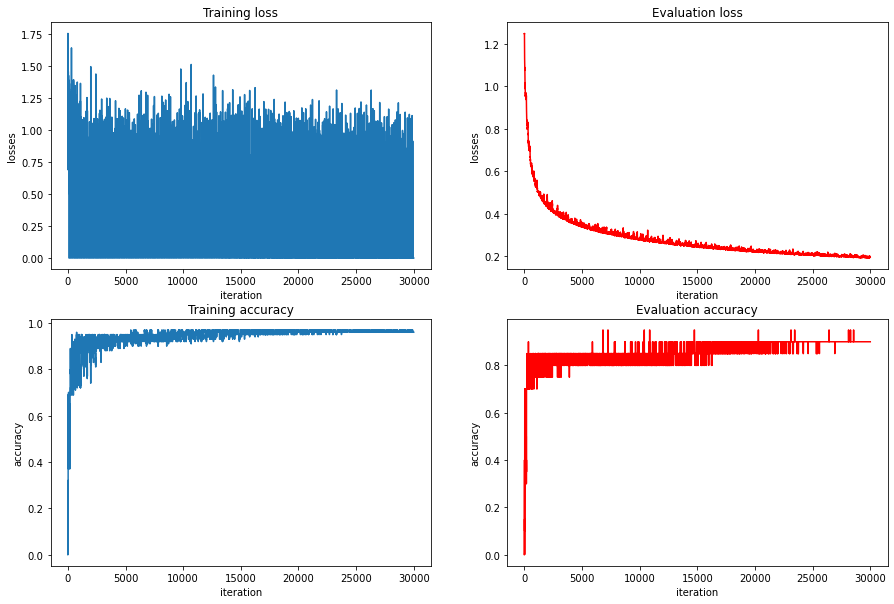

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
iris = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:4]
y = iris[:, 4]
y = y.astype('uint8') # Nx1

# normalization
maxi = np.max(X, axis=0)
mini = np.min(X, axis=0)
X = (X-mini) / (maxi-mini)

# concatenation [1 X]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1) # Nx(d+1)

# one-hot encoding
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape((-1, 1))).T # kxN

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)
X = X[inds]
y = y[:, inds]

# split into train, valuation and test set
X_train, X_val, X_test, y_train, y_val, y_test = X[:100, :], X[100:120, :], X[120:, :], \
                                                 y[:, :100], y[:, 100:120], y[:, 120:]
X_train_size = X_train.shape[0]
inds = np.arange(X_train_size)

d = 4 # dimensionality

# initialize parameters randomly
theta = np.random.rand(3,5) # kx(d+1)

# gradient descent loop
learning_rate = .05

train_losses = []
val_losses = []
train_acc = []
val_acc = []

num_iter = 200
num_sample_stochastic = 1

for epoch in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X_train = X_train[inds]
    y_train = y_train[:, inds]
    
    for i in range(X.shape[0]): 
        
        # pick 1 sample
        xi = X_train[i:i+1] # 1x(d+1)
        xi = xi.T # (d+1)x1
        yi = y_train[:,i:i+1] # kx1

        # evaluate class scores
        scores = np.dot(theta, xi) # kx1 
        
        #compute the class probabilities
        exp_scores = np.exp(scores) # kx1
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True) # kx1
        
        # compute the loss
        corect_logprobs = -yi*np.log(probs) # kx1 
        loss = np.sum(corect_logprobs)/1
        train_losses.append(loss)
                
        # compute yhati - yi
        dscores = probs - yi # kx1
        
        # backpropate the gradient to the parameters (W,b)
        dtheta = np.dot(xi, dscores.T) # (d+1)xk

        # perform a parameter update
        theta += -learning_rate *dtheta.T # kx(d+1)        
        
        # accuracy
        scores = np.dot(theta, X_train.T)
        predicted_class = np.argmax(scores, axis=0)
        train_acc.append(np.mean(encoder.transform(predicted_class.reshape((-1, 1))).T == y_train, axis=0).round().mean())
        
        # evaluation
        scores = np.dot(theta, X_val.T) 
        exp_scores = np.exp(scores) 
        probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True) 
        corect_logprobs = -y_val*np.log(probs)
        loss = np.sum(corect_logprobs)/X_val.shape[0]
        val_losses.append(loss)
        predicted_class = np.argmax(scores, axis=0)
        val_acc.append(np.mean(encoder.transform(predicted_class.reshape((-1, 1))).T == y_val, axis=0).round().mean())

# testing 
test_scores = np.dot(theta, X_test.T)
test_exp_scores = np.exp(test_scores) 
test_probs = test_exp_scores / np.sum(test_exp_scores, axis=0, keepdims=True)
test_corect_logprobs = -y_test*np.log(test_probs)
print('Testing loss: ', np.sum(test_corect_logprobs)/X_test.shape[0])
print('Testing accuracy: ',np.mean(encoder.transform(np.argmax(test_scores, axis=0).reshape((-1, 1))).T == y_test, axis=0).round().mean())
train_scores = np.dot(theta, X_train.T)
train_exp_scores = np.exp(train_scores) #
train_probs = train_exp_scores / np.sum(train_exp_scores, axis=0, keepdims=True)
train_corect_logprobs = -y_train*np.log(train_probs)
print('Training loss: ', np.sum(test_corect_logprobs)/X_train.shape[0])
print('Training accuracy: ', np.mean(encoder.transform(np.argmax(train_scores, axis=0).reshape((-1, 1))).T == y_train, axis=0).round().mean())
print('Evaluation loss: ', val_losses[-1])
print('Evaluation accuracy: ', val_acc[-1])        
        
# show figures
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0][0].plot(train_losses)
axs[0][0].set(title='Training loss', xlabel='iteration', ylabel='losses')
axs[0][1].plot(val_losses, color='r')
axs[0][1].set(title='Evaluation loss', xlabel='iteration', ylabel='losses')
axs[1][0].plot(train_acc)
axs[1][0].set(title='Training accuracy', xlabel='iteration', ylabel='accuracy')
axs[1][1].plot(val_acc, color='r')
axs[1][1].set(title='Evaluation accuracy', xlabel='iteration', ylabel='accuracy')


**b) Batch gradient descent**

Testing loss:  0.0520145626542514
Testing accuracy:  1.0
Training loss:  0.015604368796275421
Training accuracy:  0.97
Evaluation loss:  0.11262405250688871
Evaluation accuracy:  0.95


[Text(0.5, 1.0, 'Evaluation accuracy'),
 Text(0.5, 0, 'iteration'),
 Text(0, 0.5, 'accuracy')]

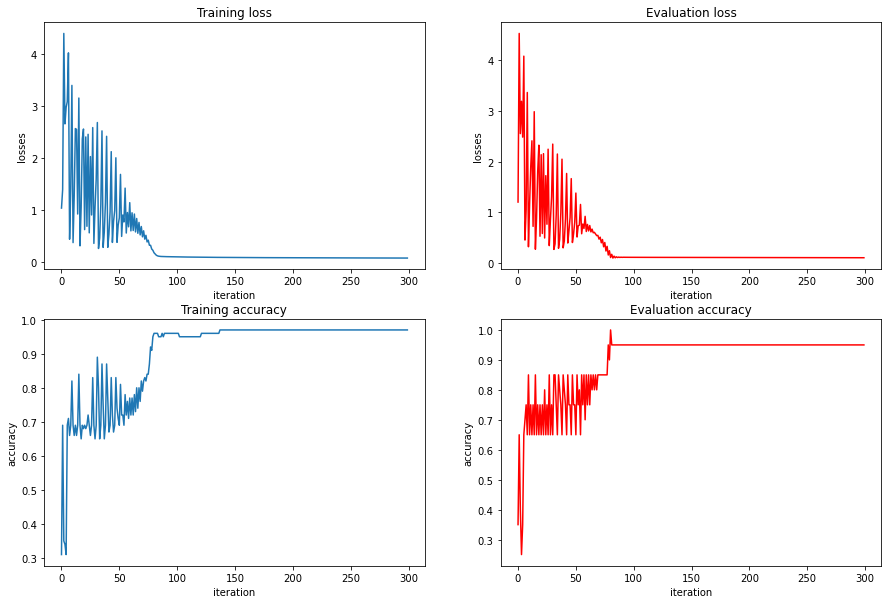

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
iris = np.genfromtxt('iris_full.csv', dtype=None, delimiter=',', skip_header=1) 
X = iris[:, 0:4]
y = iris[:, 4]
y = y.astype('uint8') # Nx1

# normalization
maxi = np.max(X, axis=0)
mini = np.min(X, axis=0)
X = (X-mini) / (maxi-mini)

# concatenation [1 X]
intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1) # Nx(d+1)

# one-hot encoding
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape((-1, 1))).T # kxN

# shuffle
inds = np.arange(X.shape[0])
np.random.shuffle(inds)
X = X[inds]
y = y[:, inds]

# split into train, valuation and test set
X_train, X_val, X_test, y_train, y_val, y_test = X[:100, :], X[100:120, :], X[120:, :], \
                                                 y[:, :100], y[:, 100:120], y[:, 120:]
X_train_size = X_train.shape[0]
inds = np.arange(X_train_size)

d = 4 # dimensionality

# initialize parameters randomly
theta = np.random.rand(3,5) # kx(d+1)

# gradient descent loop
learning_rate = .1

train_losses = []
val_losses = []
train_acc = []
val_acc = []

num_iter = 300
num_sample_stochastic = 1

for epoch in range(num_iter):
    
    # shuffle
    np.random.shuffle(inds)
    X_train = X_train[inds]
    y_train = y_train[:, inds]

    # evaluate class scores
    scores = np.dot(theta, X_train.T) # kxN

    #compute the class probabilities
    exp_scores = np.exp(scores) # kxN
    probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True) # kxN

    # compute the loss
    corect_logprobs = -y_train*np.log(probs) # kxN 
    loss = np.sum(corect_logprobs)/X_train.shape[0]
    train_losses.append(loss)

    # compute yhati - yi
    dscores = probs - y_train # kxN

    # backpropate the gradient to the parameters (W,b)
    dtheta = np.dot(X_train.T, dscores.T) # (d+1)xk

    # perform a parameter update
    theta += -learning_rate *dtheta.T # kx(d+1)        

    # accuracy
    scores = np.dot(theta, X_train.T)
    predicted_class = np.argmax(scores, axis=0)
    train_acc.append(np.mean(encoder.transform(predicted_class.reshape((-1, 1))).T == y_train, axis=0).round().mean())

    # evaluation
    scores = np.dot(theta, X_val.T) 
    exp_scores = np.exp(scores) 
    probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True) 
    corect_logprobs = -y_val*np.log(probs)
    loss = np.sum(corect_logprobs)/X_val.shape[0]
    val_losses.append(loss)
    predicted_class = np.argmax(scores, axis=0)
    val_acc.append(np.mean(encoder.transform(predicted_class.reshape((-1, 1))).T == y_val, axis=0).round().mean())

# testing 
test_scores = np.dot(theta, X_test.T)
test_exp_scores = np.exp(test_scores) 
test_probs = test_exp_scores / np.sum(test_exp_scores, axis=0, keepdims=True)
test_corect_logprobs = -y_test*np.log(test_probs)
print('Testing loss: ', np.sum(test_corect_logprobs)/X_test.shape[0])
print('Testing accuracy: ',np.mean(encoder.transform(np.argmax(test_scores, axis=0).reshape((-1, 1))).T == y_test, axis=0).round().mean())
train_scores = np.dot(theta, X_train.T)
train_exp_scores = np.exp(train_scores) #
train_probs = train_exp_scores / np.sum(train_exp_scores, axis=0, keepdims=True)
train_corect_logprobs = -y_train*np.log(train_probs)
print('Training loss: ', np.sum(test_corect_logprobs)/X_train.shape[0])
print('Training accuracy: ', np.mean(encoder.transform(np.argmax(train_scores, axis=0).reshape((-1, 1))).T == y_train, axis=0).round().mean())
print('Evaluation loss: ', val_losses[-1])
print('Evaluation accuracy: ', val_acc[-1])        
        
# show figures
fig, axs = plt.subplots(2, 2, figsize=(15,10))
axs[0][0].plot(train_losses)
axs[0][0].set(title='Training loss', xlabel='iteration', ylabel='losses')
axs[0][1].plot(val_losses, color='r')
axs[0][1].set(title='Evaluation loss', xlabel='iteration', ylabel='losses')
axs[1][0].plot(train_acc)
axs[1][0].set(title='Training accuracy', xlabel='iteration', ylabel='accuracy')
axs[1][1].plot(val_acc, color='r')
axs[1][1].set(title='Evaluation accuracy', xlabel='iteration', ylabel='accuracy')
